In [153]:
import numpy as np

In [154]:
import pandas as pd

In [155]:
df = pd.read_csv("Churn_Modelling.csv")

In [156]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [157]:
df["NumOfProducts"].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [158]:
#observation - value_counts


#set 1

#Abnermality : No of products are 50 forone person

In [159]:
df.shape

(10000, 14)

In [160]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [161]:
df.columns = ['RowNumber', 'Id', 'name', 'Score', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCard',
       'IsActiveMember', 'Salary', 'Exited']

In [162]:
df

,RowNumber,Id,name,Score,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCard,IsActiveMember,Salary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [163]:
df["HasCard"].value_counts()

1    7055
0    2945
Name: HasCard, dtype: int64

In [164]:
df["IsActiveMember"].value_counts()

1    5151
0    4849
Name: IsActiveMember, dtype: int64

In [165]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [166]:
df.dtypes

RowNumber           int64
Id                  int64
name               object
Score               int64
Geography          object
Gender             object
Age                 int64
Tenure              int64
Balance           float64
NumOfProducts       int64
HasCard             int64
IsActiveMember      int64
Salary            float64
Exited              int64
dtype: object

In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   RowNumber       10000 non-null  int64  
 1   Id              10000 non-null  int64  
 2   name            10000 non-null  object 
 3   Score           10000 non-null  int64  
 4   Geography       10000 non-null  object 
 5   Gender          10000 non-null  object 
 6   Age             10000 non-null  int64  
 7   Tenure          10000 non-null  int64  
 8   Balance         10000 non-null  float64
 9   NumOfProducts   10000 non-null  int64  
 10  HasCard         10000 non-null  int64  
 11  IsActiveMember  10000 non-null  int64  
 12  Salary          10000 non-null  float64
 13  Exited          10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [168]:
df.head()

,RowNumber,Id,name,Score,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCard,IsActiveMember,Salary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [169]:
#observation

#describe()

#1 - 20% people exited
#2 - 20% cost has cc

In [170]:
df.tail()

,RowNumber,Id,name,Score,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCard,IsActiveMember,Salary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [171]:
df.isnull().sum()

RowNumber         0
Id                0
name              0
Score             0
Geography         0
Gender            0
Age               0
Tenure            0
Balance           0
NumOfProducts     0
HasCard           0
IsActiveMember    0
Salary            0
Exited            0
dtype: int64

In [172]:
df.corr()

,RowNumber,Id,Score,Age,Tenure,Balance,NumOfProducts,HasCard,IsActiveMember,Salary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
Id,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
Score,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
Salary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [173]:
#domain kn - insights - proper preprocessing - proper data manipulation - algoritham - best output

In [174]:
import matplotlib.pyplot as plt

In [175]:
import seaborn as sns

In [176]:
%matplotlib inline

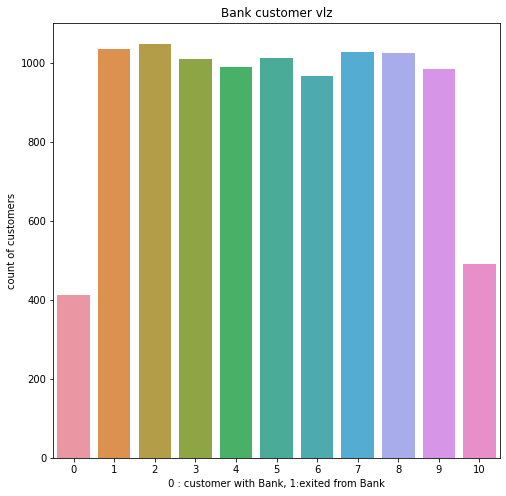

In [177]:
plt.figure(figsize=(8,8))
sns.countplot(x= "Tenure",data=df)
plt.xlabel(" 0 : customer with Bank, 1:exited from Bank ")
plt.ylabel("count of customers")
plt.title("Bank customer vlz")
plt.show()

In [178]:
df.columns

Index(['RowNumber', 'Id', 'name', 'Score', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCard', 'IsActiveMember',
       'Salary', 'Exited'],
      dtype='object')

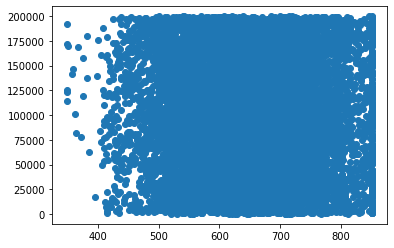

In [179]:
plt.scatter(df.Score,df.Salary)

In [180]:
df.head()

,RowNumber,Id,name,Score,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCard,IsActiveMember,Salary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [181]:
df.columns

Index(['RowNumber', 'Id', 'name', 'Score', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCard', 'IsActiveMember',
       'Salary', 'Exited'],
      dtype='object')

In [182]:
df.drop(['RowNumber', 'Id', 'name'],axis=1,inplace=True)

In [183]:
df.head()

,Score,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCard,IsActiveMember,Salary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Score           10000 non-null  int64  
 1   Geography       10000 non-null  object 
 2   Gender          10000 non-null  object 
 3   Age             10000 non-null  int64  
 4   Tenure          10000 non-null  int64  
 5   Balance         10000 non-null  float64
 6   NumOfProducts   10000 non-null  int64  
 7   HasCard         10000 non-null  int64  
 8   IsActiveMember  10000 non-null  int64  
 9   Salary          10000 non-null  float64
 10  Exited          10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [185]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [186]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [187]:
# 1 Manual python
# 2 Label Encoder
# 3 One Hot Encoder
# 4 Dumy Vlue


In [188]:
geography = pd.get_dummies(df["Geography"],drop_first=False)

In [189]:
geography.head()

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1


In [190]:
gender = pd.get_dummies(df["Gender"],drop_first=False)

In [191]:
df=pd.concat([df,geography,gender], axis=1)

In [192]:
df

,Score,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCard,IsActiveMember,Salary,Exited,France,Germany,Spain,Female,Male
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0,1,0,0,0,1
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,1,0,0,0,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,0,0,1,0
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0,1,0,0,1


In [193]:
df.drop(["Geography","Gender"], axis=1, inplace=True)

In [194]:
df.head()

,Score,Age,Tenure,Balance,NumOfProducts,HasCard,IsActiveMember,Salary,Exited,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [195]:
x=df.drop('Exited',axis=1)

In [196]:
x

,Score,Age,Tenure,Balance,NumOfProducts,HasCard,IsActiveMember,Salary,France,Germany,Spain,Female,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,0,1,0,0,1


In [197]:
y=df['Exited']

In [198]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [199]:
df.shape

(10000, 14)

In [200]:
x.shape

(10000, 13)

In [201]:
y.shape

(10000,)

In [202]:
from sklearn.model_selection import train_test_split

In [203]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2,random_state=0)

In [204]:
x_train.shape

(8000, 13)

In [205]:
x_test.shape

(2000, 13)

In [206]:
y_train.shape

(8000,)

In [207]:
y_test.shape

(2000,)

In [208]:
from sklearn.preprocessing import StandardScaler

In [209]:
sc=StandardScaler()

In [210]:
x_train

,Score,Age,Tenure,Balance,NumOfProducts,HasCard,IsActiveMember,Salary,France,Germany,Spain,Female,Male
7389,667,34,5,0.00,2,1,0,163830.64,0,0,1,1,0
9275,427,42,1,75681.52,1,1,1,57098.00,0,1,0,0,1
2995,535,29,2,112367.34,1,1,0,185630.76,1,0,0,1,0
5316,654,40,5,105683.63,1,1,0,173617.09,0,0,1,0,1
356,850,57,8,126776.30,2,1,1,132298.49,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9225,594,32,4,120074.97,2,1,1,162961.79,0,1,0,1,0
4859,794,22,4,114440.24,1,1,1,107753.07,0,0,1,1,0
3264,738,35,5,161274.05,2,1,0,181429.87,1,0,0,0,1
9845,590,38,9,0.00,2,1,1,148750.16,0,0,1,1,0


In [211]:
x_train=sc.fit_transform(x_train)

In [212]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ...,  1.74309049,
         1.09168714, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ..., -0.57369368,
        -0.91601335,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.57369368,
         1.09168714, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.57369368,
        -0.91601335,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ...,  1.74309049,
         1.09168714, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ..., -0.57369368,
         1.09168714, -1.09168714]])

In [213]:
x_test=sc.transform(x_test)

In [214]:
x_test

array([[-0.55204276, -0.36890377,  1.04473698, ..., -0.57369368,
         1.09168714, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.57369368,
         1.09168714, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ...,  1.74309049,
         1.09168714, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ...,  1.74309049,
        -0.91601335,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ..., -0.57369368,
        -0.91601335,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ..., -0.57369368,
        -0.91601335,  0.91601335]])

In [215]:
x_train[0:1, :]

array([[ 0.16958176, -0.46460796,  0.00666099, -1.21571749,  0.8095029 ,
         0.64259497, -1.03227043,  1.10643166, -1.01460667, -0.5698444 ,
         1.74309049,  1.09168714, -1.09168714]])

In [216]:
df.iloc[0:1,:]

,Score,Age,Tenure,Balance,NumOfProducts,HasCard,IsActiveMember,Salary,Exited,France,Germany,Spain,Female,Male
0,619,42,2,0.0,1,1,1,101348.88,1,1,0,0,1,0


In [217]:
x_train

array([[ 0.16958176, -0.46460796,  0.00666099, ...,  1.74309049,
         1.09168714, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ..., -0.57369368,
        -0.91601335,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.57369368,
         1.09168714, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.57369368,
        -0.91601335,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ...,  1.74309049,
         1.09168714, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ..., -0.57369368,
         1.09168714, -1.09168714]])